### P-1
#### 1. Stationarity: The time series data for sales, Google clicks, and Facebook impressions is stationary (i.e., mean and variance do not change over time)
#### 2. Trend: There is a significant upward or downward trend in the sales data over time. This could indicate a growing or declining market.
#### 3. Seasonality: The sales data exhibits seasonality (e.g., weekly, monthly, or yearly patterns). This is common in retail data due to holidays, promotions, and other recurring events.

##### We can check stationarity of data by following ways:
        1. Visualisation
        2. Statistical Tests:
            a. ADF Test
            b. KPSS Test
            Conclusions that can be drawn from Statistical Tests:
                - Case 1: Both tests conclude that the given series is stationary – The series is stationary
                - Case 2: Both tests conclude that the given series is non-stationary – The series is non-stationary
                - Case 3: ADF concludes non-stationary, and KPSS concludes stationary – The series is trend stationary. 
                - Case 4: ADF concludes stationary, and KPSS concludes non-stationary – The series is difference stationary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
data_product_A = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA.xlsx')
data_google_clicks = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA_google_clicks.xlsx')
data_facebook_impressions = pd.read_excel(r'E:\Internships\Infospring\_Demand_Forecasting_Retailer\ProductA_fb_impressions.xlsx')
merged_df = pd.merge(data_product_A, data_google_clicks, on='Day Index')
product_clicks_impression = pd.merge(merged_df, data_facebook_impressions, on='Day Index')
product_clicks_impression

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


In [4]:
copy_data_product_A = data_product_A
copy_data_google_clicks = data_google_clicks
copy_data_facebook_impressions = data_facebook_impressions

In [5]:
del copy_data_product_A['Day Index']
del copy_data_google_clicks['Day Index']
del copy_data_facebook_impressions['Day Index']

#### ADF Test

In [6]:
# Function to print out results in customised manner
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#### KPSS Test

In [7]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

#### Function converting data into weeks, 15-days and months span

In [8]:
# Function to convert in week format
def convert_week(dataframe):
    weekly_stats = pd.DataFrame(columns=['mean', 'variance', 'std'])
    for i in range(0, len(dataframe), 7):
        k = i + 7
        if k > len(dataframe):
            k = len(dataframe)
        mean = dataframe[i:k].mean()[0]
        var =  dataframe[i:k].var()[0]
        std = dataframe[i:k].std()[0]
        weekly_stats.loc[len(weekly_stats)] = [mean, var, std]
    return weekly_stats

In [9]:
# Function to convert in 15-days
def convert_15_day(dataframe):
    fortnight_stats = pd.DataFrame(columns=['mean', 'variance', 'std'])
    for i in range(0, len(dataframe), 15):
        k = i + 15
        if k > len(dataframe):
            k = len(dataframe)
        mean = dataframe[i:k].mean()[0]
        var =  dataframe[i:k].var()[0]
        std = dataframe[i:k].std()[0]
        fortnight_stats.loc[len(fortnight_stats)] = [mean, var, std]
    return fortnight_stats

In [10]:
# Function to convert in month format
div = [31,31,28,31,30,31,30]
def convert_to_month(dataframe):
    j = 0
    month_stats = pd.DataFrame(columns=['mean', 'variance', 'std'])
    for i in range(0, len(dataframe), div[j]):
        k = div[j] +i
        mean = dataframe[i:k].mean()[0]
        var =  dataframe[i:k].var()[0]
        std = dataframe[i:k].std()[0]
        month_stats.loc[len(month_stats)] = [mean, var, std]
        j += 1
    return month_stats

In [11]:
def avg_mean_fun(dataframe):
    avg_df = pd.DataFrame(columns=['mean', 'variance', 'std'])
    for i in range(0, len(dataframe)):
        mean = dataframe[0:i].mean()[0]
        var =  dataframe[0:i].var()[0]
        std = dataframe[0:i].std()[0]
        avg_df.loc[len(avg_df)] = [mean, var, std]
    return avg_df

#### Product A

##### Daily --> conclusion Case-1 

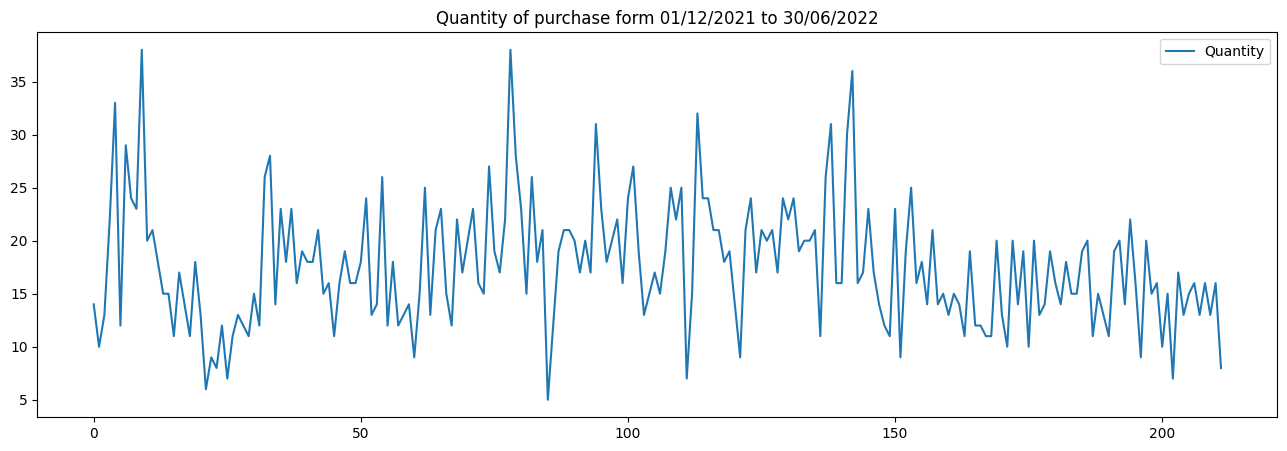

In [12]:
# Plotting the Data
# Define the plot size
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(copy_data_product_A.index, copy_data_product_A['Quantity'], label = "Quantity")
plt.legend(loc='best')
plt.title("Quantity of purchase form 01/12/2021 to 30/06/2022")
plt.show()

In [13]:
adf_test(copy_data_product_A['Quantity'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.445717
p-value                          0.000246
#Lags Used                       3.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64


In [14]:
kpss_test(copy_data_product_A['Quantity'])

Results of KPSS Test:
Test Statistic           0.322623
p-value                  0.100000
#Lags Used               7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### Weekly ---> conclusion Case-3

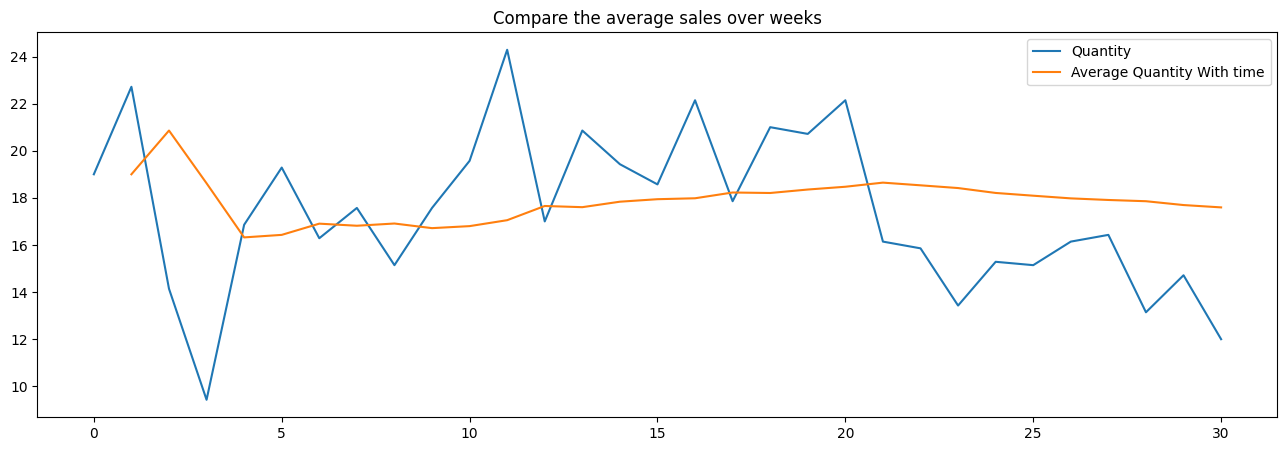

In [15]:
product_A_in_weeks = convert_week(copy_data_product_A)
product_A_in_weeks_avg = avg_mean_fun(product_A_in_weeks)
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(product_A_in_weeks.index, product_A_in_weeks['mean'], label = "Quantity")
plt.plot(product_A_in_weeks_avg.index, product_A_in_weeks_avg['mean'], label = "Average Quantity With time")
plt.legend(loc='best')
plt.title("Compare the average sales over weeks")
plt.show()

In [16]:
adf_test(product_A_in_weeks['mean'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.658708
p-value                         0.081460
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [17]:
kpss_test(product_A_in_weeks['mean'])

Results of KPSS Test:
Test Statistic           0.279635
p-value                  0.100000
#Lags Used               2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### 15-days ---> conclusion Case-1

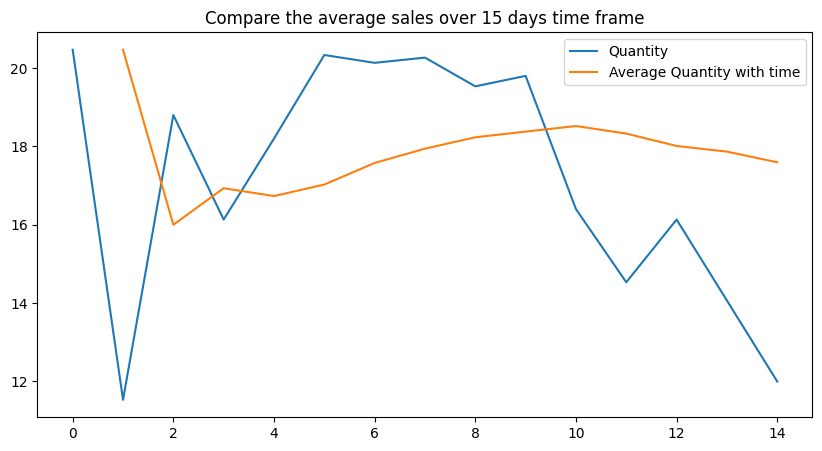

In [18]:
product_A_in_15_days = convert_15_day(copy_data_product_A)
product_A_in_15_days_avg = avg_mean_fun(product_A_in_15_days)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(product_A_in_15_days.index, product_A_in_15_days['mean'], label = "Quantity")
plt.plot(product_A_in_15_days_avg.index, product_A_in_15_days_avg['mean'], label = "Average Quantity with time")
plt.legend(loc='best')
plt.title("Compare the average sales over 15 days time frame")
plt.show()


In [19]:
adf_test(product_A_in_15_days['mean'])

Results of Dickey-Fuller Test:
Test Statistic                -27.700045
p-value                         0.000000
#Lags Used                      5.000000
Number of Observations Used     9.000000
Critical Value (1%)            -4.473135
Critical Value (5%)            -3.289881
Critical Value (10%)           -2.772382
dtype: float64


In [20]:
kpss_test(product_A_in_15_days['mean'])

Results of KPSS Test:
Test Statistic           0.303843
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### Monthly ---> conclusion Case-3 

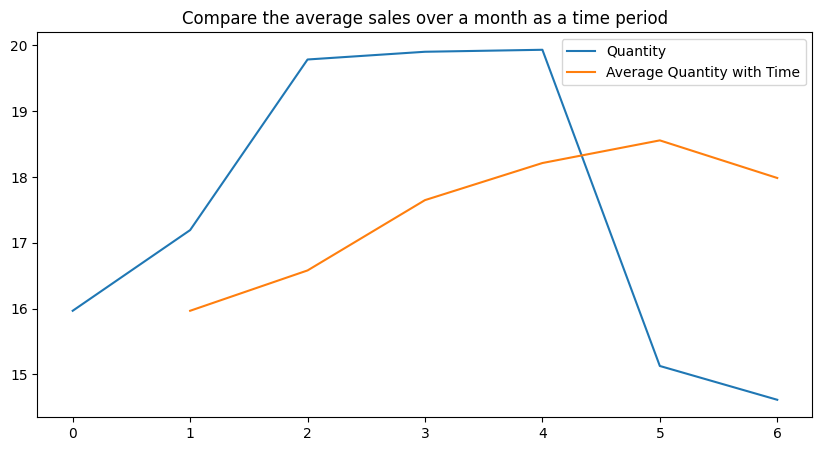

In [21]:
product_A_in_months = convert_to_month(copy_data_product_A)
product_A_in_months_avg = avg_mean_fun(product_A_in_months)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(product_A_in_months.index, product_A_in_months['mean'], label = "Quantity")
plt.plot(product_A_in_months_avg.index, product_A_in_months_avg['mean'], label = "Average Quantity with Time")
plt.legend(loc='best')
plt.title("Compare the average sales over a month as a time period")
plt.show()

In [22]:
adf_test(product_A_in_months['mean'])

Results of Dickey-Fuller Test:
Test Statistic                -1.736927
p-value                        0.412194
#Lags Used                     1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [23]:
kpss_test(product_A_in_months['mean'])

Results of KPSS Test:
Test Statistic           0.15723
p-value                  0.10000
#Lags Used               1.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


#### Google Clicks

##### Daily --> conclusion Case-2

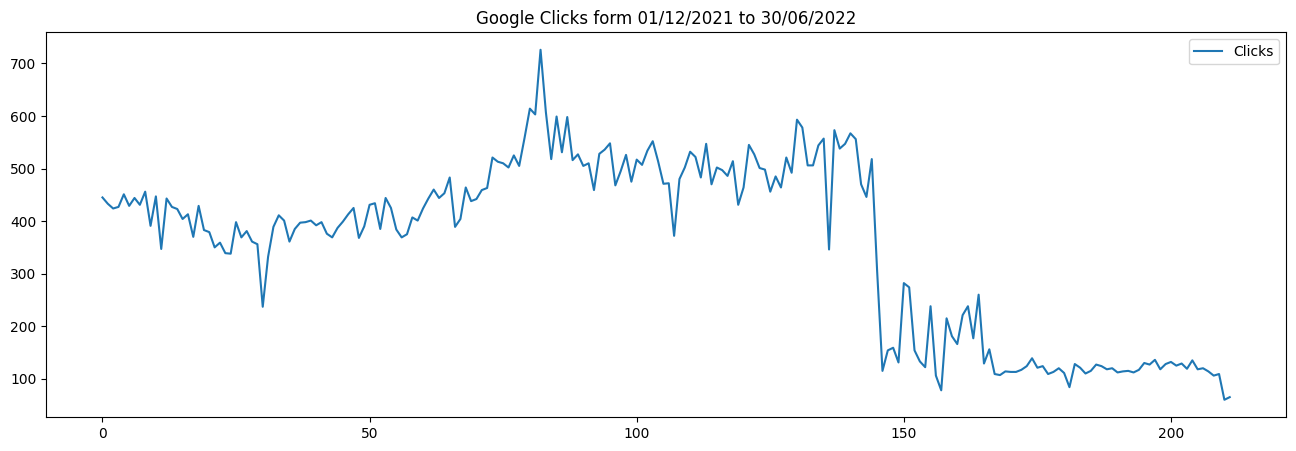

In [24]:
# Plotting the Data
# Define the plot size
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(copy_data_google_clicks.index, copy_data_google_clicks['Clicks'], label = "Clicks")
plt.legend(loc='best')
plt.title("Google Clicks form 01/12/2021 to 30/06/2022")
plt.show()

In [25]:
adf_test(copy_data_google_clicks['Clicks'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.870572
p-value                          0.797509
#Lags Used                       2.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [26]:
kpss_test(copy_data_google_clicks['Clicks'])

Results of KPSS Test:
Test Statistic           1.171045
p-value                  0.010000
#Lags Used               9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### Weekly ---> conclusion Case-4

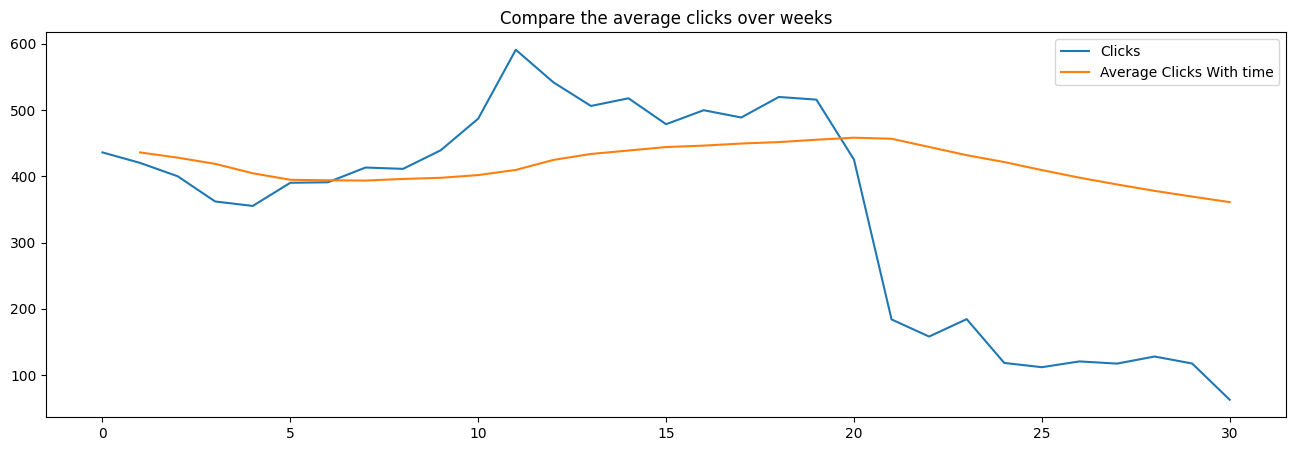

In [27]:
google_clicks_in_weeks = convert_week(copy_data_google_clicks)
google_clicks_in_weeks_avg = avg_mean_fun(google_clicks_in_weeks)
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(google_clicks_in_weeks.index, google_clicks_in_weeks['mean'], label = "Clicks")
plt.plot(google_clicks_in_weeks_avg.index, google_clicks_in_weeks_avg['mean'], label = "Average Clicks With time")
plt.legend(loc='best')
plt.title("Compare the average clicks over weeks")
plt.show()

In [28]:
adf_test(google_clicks_in_weeks['mean'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.249489
p-value                         0.017293
#Lags Used                      9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [29]:
kpss_test(google_clicks_in_weeks['mean'])

Results of KPSS Test:
Test Statistic           0.515461
p-value                  0.038185
#Lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


##### 15-days ---> conclusion Case-3

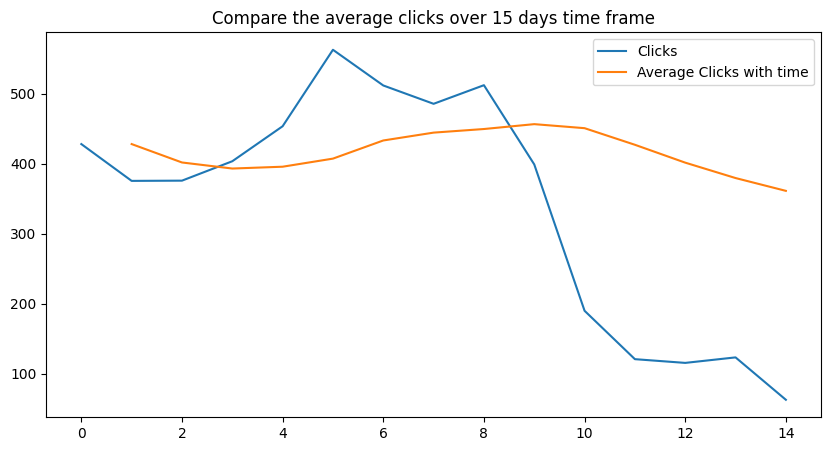

In [30]:
google_clicks_in_15_days = convert_15_day(copy_data_google_clicks)
google_clicks_in_15_days_avg = avg_mean_fun(google_clicks_in_15_days)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(google_clicks_in_15_days.index, google_clicks_in_15_days['mean'], label = "Clicks")
plt.plot(google_clicks_in_15_days_avg.index, google_clicks_in_15_days_avg['mean'], label = "Average Clicks with time")
plt.legend(loc='best')
plt.title("Compare the average clicks over 15 days time frame")
plt.show()


In [31]:
adf_test(google_clicks_in_15_days['mean'])

Results of Dickey-Fuller Test:
Test Statistic                -1.673423
p-value                        0.444855
#Lags Used                     5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [32]:
kpss_test(google_clicks_in_15_days['mean'])

Results of KPSS Test:
Test Statistic           0.394895
p-value                  0.079356
#Lags Used               2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


##### Monthly ---> conclusion Case-3

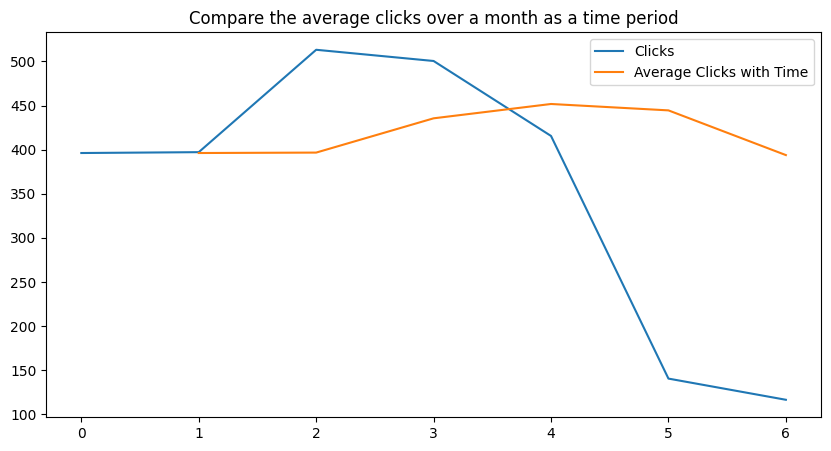

In [33]:
google_clicks_in_months = convert_to_month(copy_data_google_clicks)
google_clicks_in_months_avg = avg_mean_fun(google_clicks_in_months)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(google_clicks_in_months.index, google_clicks_in_months['mean'], label = "Clicks")
plt.plot(google_clicks_in_months_avg.index, google_clicks_in_months_avg['mean'], label = "Average Clicks with Time")
plt.legend(loc='best')
plt.title("Compare the average clicks over a month as a time period")
plt.show()

In [34]:
adf_test(google_clicks_in_months['mean'])

Results of Dickey-Fuller Test:
Test Statistic                -1.744715
p-value                        0.408233
#Lags Used                     1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [35]:
kpss_test(google_clicks_in_months['mean'])

Results of KPSS Test:
Test Statistic           0.292664
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


#### Facebook Impressions

##### Daily ---> conclusion Case-3

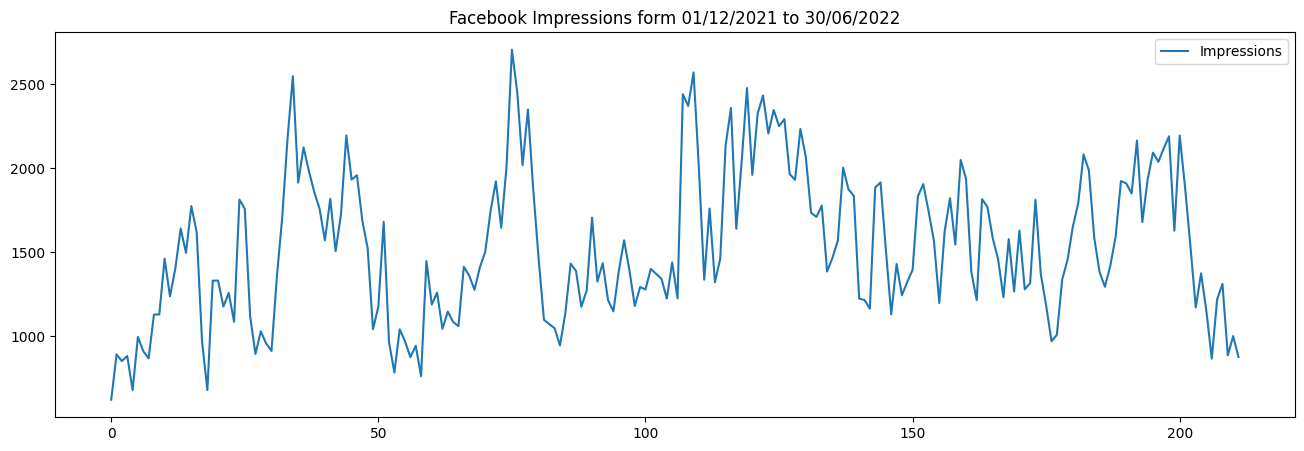

In [36]:
# Plotting the Data
# Define the plot size
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(copy_data_facebook_impressions.index, copy_data_facebook_impressions['Impressions'], label = "Impressions")
plt.legend(loc='best')
plt.title("Facebook Impressions form 01/12/2021 to 30/06/2022")
plt.show()

In [37]:
adf_test(copy_data_facebook_impressions['Impressions'])

Results of Dickey-Fuller Test:
Test Statistic                -5.696206e+00
p-value                        7.863580e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


In [38]:
kpss_test(copy_data_facebook_impressions['Impressions'])

Results of KPSS Test:
Test Statistic           0.351808
p-value                  0.097928
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


##### Weekly ---> conclusion Case-1

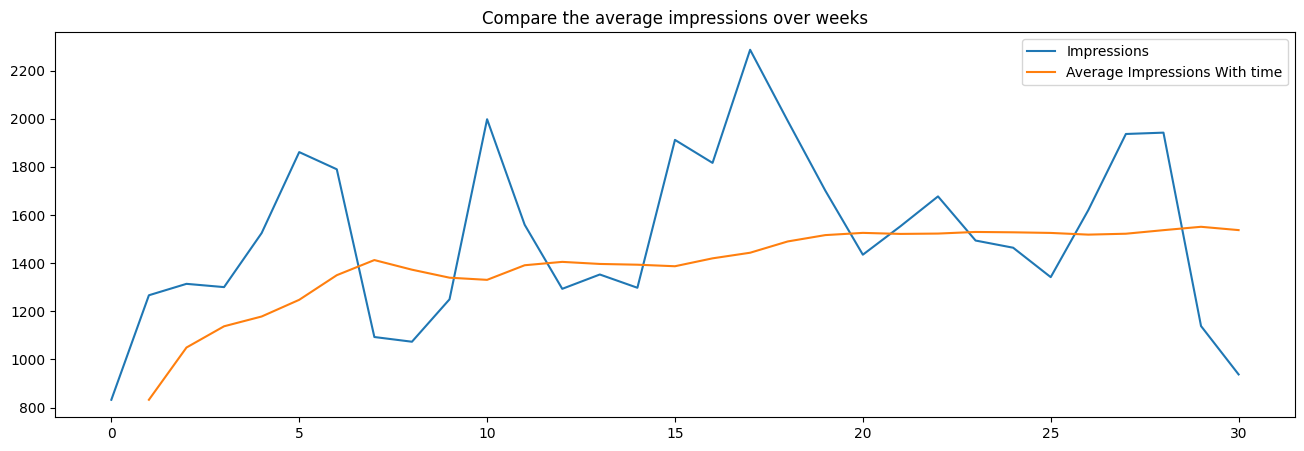

In [39]:
facebook_impressions_in_weeks = convert_week(copy_data_facebook_impressions)
facebook_impressions_in_weeks_avg = avg_mean_fun(facebook_impressions_in_weeks)
plt.figure(figsize=(16,5))
# Plot the data
plt.plot(facebook_impressions_in_weeks.index, facebook_impressions_in_weeks['mean'], label = "Impressions")
plt.plot(facebook_impressions_in_weeks_avg.index, facebook_impressions_in_weeks_avg['mean'], label = "Average Impressions With time")
plt.legend(loc='best')
plt.title("Compare the average impressions over weeks")
plt.show()

In [40]:
adf_test(facebook_impressions_in_weeks['mean'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.751606
p-value                         0.003443
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [41]:
kpss_test(facebook_impressions_in_weeks['mean'])

Results of KPSS Test:
Test Statistic           0.218155
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### 15-days ---> conclusion Case-1

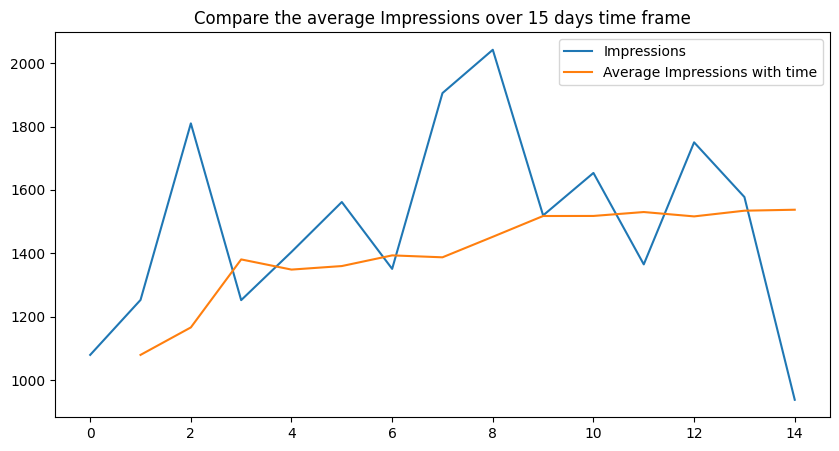

In [42]:
facebook_impressions_in_15_days = convert_15_day(copy_data_facebook_impressions)
facebook_impressions_in_15_days_avg = avg_mean_fun(facebook_impressions_in_15_days)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(facebook_impressions_in_15_days.index, facebook_impressions_in_15_days['mean'], label = "Impressions")
plt.plot(facebook_impressions_in_15_days_avg.index, facebook_impressions_in_15_days_avg['mean'], label = "Average Impressions with time")
plt.legend(loc='best')
plt.title("Compare the average Impressions over 15 days time frame")
plt.show()


In [43]:
adf_test(facebook_impressions_in_15_days['mean'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.101915
p-value                         0.026412
#Lags Used                      0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [44]:
kpss_test(facebook_impressions_in_15_days['mean'])

Results of KPSS Test:
Test Statistic           0.176397
p-value                  0.100000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


##### Monthly ---> conclusion Case-1

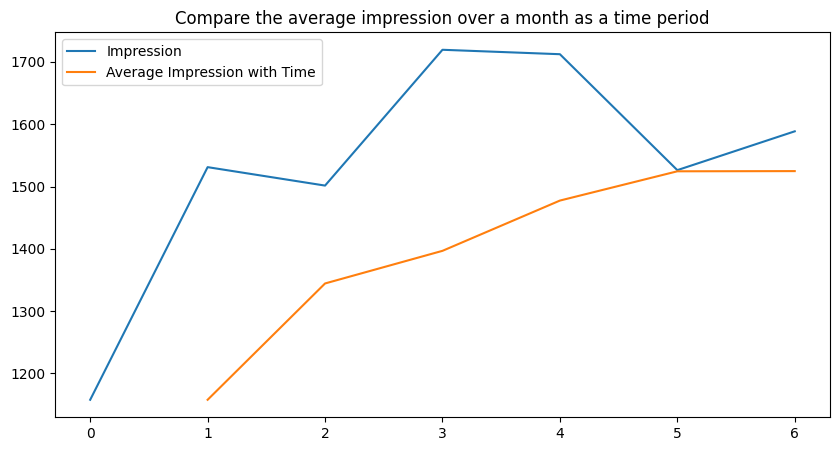

In [45]:
facebook_impression_months = convert_to_month(copy_data_facebook_impressions)
facebook_impression_months_avg = avg_mean_fun(facebook_impression_months)
plt.figure(figsize=(10,5))
# Plot the data
plt.plot(facebook_impression_months.index, facebook_impression_months['mean'], label = "Impression")
plt.plot(facebook_impression_months_avg.index, facebook_impression_months_avg['mean'], label = "Average Impression with Time")
plt.legend(loc='best')
plt.title("Compare the average impression over a month as a time period")
plt.show()

In [46]:
adf_test(facebook_impression_months['mean'])

Results of Dickey-Fuller Test:
Test Statistic                -3.791038
p-value                        0.003000
#Lags Used                     0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [47]:
kpss_test(facebook_impression_months['mean'])

Results of KPSS Test:
Test Statistic           0.344053
p-value                  0.100000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Sunil Magare\AppData\Local\Temp\ipykernel_12788\3002020788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


#### Conclusion:
        1. We can see periodic trends in facebook impressions initially impression increases and then decreases
        2. Simiarly the Sales also has the same trend as facebook impressions
        3. The google clicks decrease after the second month

#### Observation: We can see some trend in sales in case of monthly sales and some what in weekly sales as well.

##### Outlier removal

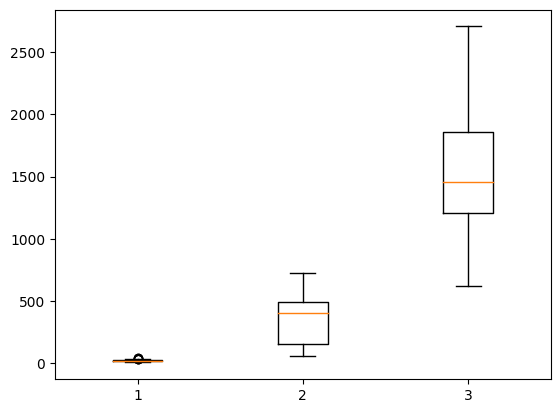

In [48]:
plt.figure(3)
plt.boxplot([data_product_A['Quantity'], data_google_clicks['Clicks'], data_facebook_impressions['Impressions']])
plt.show()

In [49]:
data_product_A.describe()

,Quantity
count,212.000000
mean,17.542453
std,5.790423
min,5.000000
25%,13.750000
50%,17.000000
75%,21.000000
max,38.000000


In [50]:
Q1 = 13.75
Q3 = 21.00
IQR = Q3 - Q1
Lower_lim = Q1 - 1.5*IQR
Upper_lim = Q3 + 1.5*IQR
print("This are lower and upper Limits ", Lower_lim, Upper_lim)

This are lower and upper Limits  2.875 31.875


In [51]:
without_outlier_data_product_A = data_product_A[(data_product_A['Quantity'] > Lower_lim) & (data_product_A['Quantity'] < Upper_lim)]

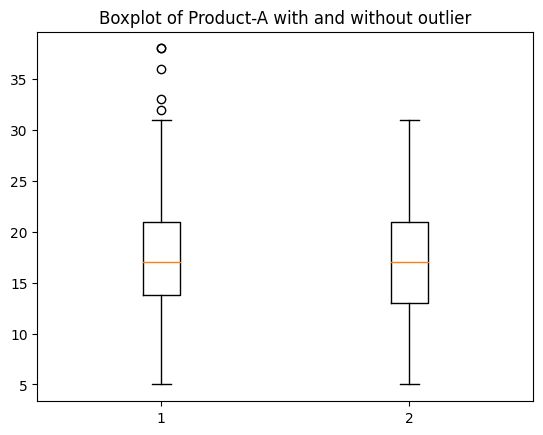

In [52]:
plt.figure(2)
plt.boxplot([data_product_A['Quantity'], without_outlier_data_product_A['Quantity']])
plt.title('Boxplot of Product-A with and without outlier')
plt.show()

##### ***RESULT : Case-4***

In [53]:
adf_test(without_outlier_data_product_A['Quantity'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.516446
p-value                          0.000184
#Lags Used                       3.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [54]:
kpss_test(without_outlier_data_product_A['Quantity'])

Results of KPSS Test:
Test Statistic           0.348312
p-value                  0.099434
#Lags Used               7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


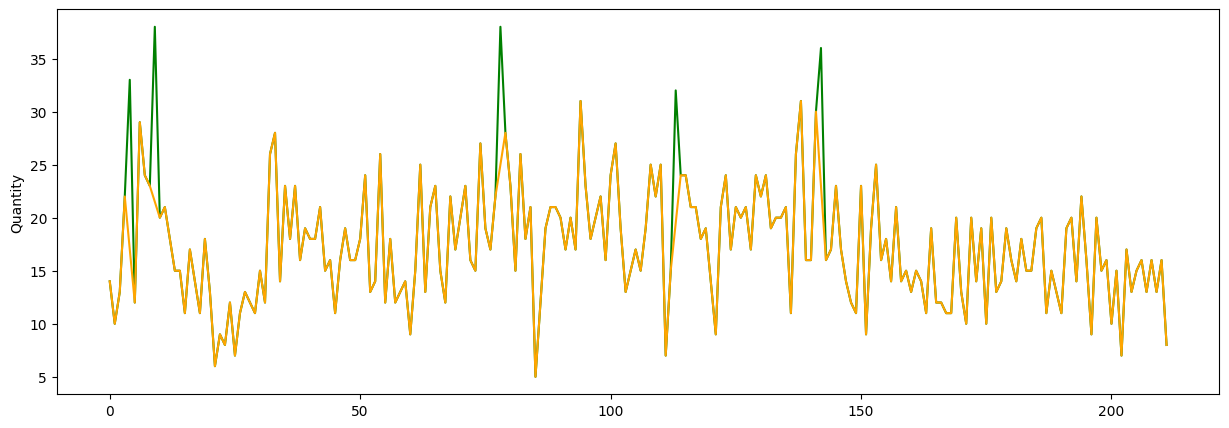

In [55]:
plt.figure(figsize=(15,5))
plt.plot(data_product_A.index, data_product_A['Quantity'], label = 'with outliers', color = 'green')
plt.plot(without_outlier_data_product_A.index, without_outlier_data_product_A['Quantity'], label = 'without outliers', color = 'orange')
plt.ylabel('Quantity')
plt.show()

##### Trend check

In [56]:
import pymannkendall as mk
mk.original_test(data_product_A)

Mann_Kendall_Test(trend='no trend', h=False, p=0.1479645859286245, z=-1.446758456124471, Tau=-0.06670839667352231, s=-1492.0, var_s=1062094.6666666667, slope=-0.0078125, intercept=17.82421875)

In [57]:
mk.original_test(product_A_in_15_days['mean'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.06676222965201273, z=-1.8332713375422665, Tau=-0.3619047619047619, s=-38.0, var_s=407.3333333333333, slope=-0.3000000000000001, intercept=20.3)

In [58]:
mk.original_test(product_A_in_weeks['mean'])

Mann_Kendall_Test(trend='no trend', h=False, p=0.0828051183952152, z=-1.734637017859063, Tau=-0.221505376344086, s=-103.0, var_s=3457.6666666666665, slope=-0.1344537815126051, intercept=19.016806722689076)

In [59]:
mk.original_test(product_A_in_months['mean'])

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=-0.047619047619047616, s=-1.0, var_s=44.333333333333336, slope=-0.1677419354838708, intercept=17.69677419354839)

______

### 4. Autocorrelation: There is a significant correlation between past and future values of sales, clicks, or impressions. This can be used to build autoregressive models (ARIMA).

### 5. Lagged Effects: Past values of sales, clicks, or impressions have a significant impact on current sales. This could indicate a delayed response to marketing efforts or a carryover effect from previous periods.

##### Daily

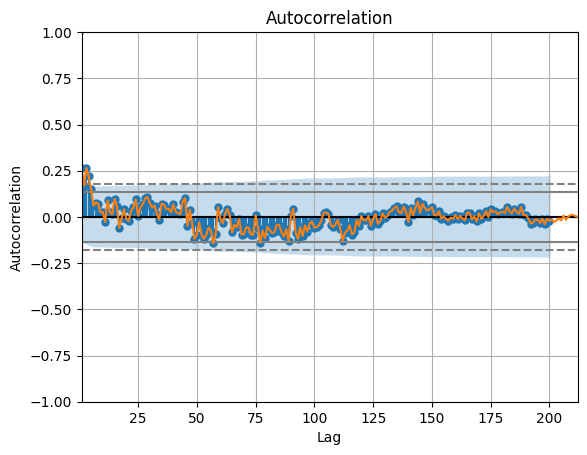

In [60]:
plot_acf(data_product_A['Quantity'], lags= 200)
pd.plotting.autocorrelation_plot(data_product_A['Quantity'])
plt.show()

In [61]:
# Creating Lags
data_of_product_lags = data_product_A
data_of_product_lags['Clicks'] = data_google_clicks['Clicks']
data_of_product_lags['Impressions'] = data_facebook_impressions['Impressions']
data_of_product_lags['lag_1'] = data_product_A['Quantity'].shift(1)
data_of_product_lags['lag_2'] = data_product_A['Quantity'].shift(2)
data_of_product_lags['lag_3'] = data_product_A['Quantity'].shift(3)
data_of_product_lags['lag_4'] = data_product_A['Quantity'].shift(4)


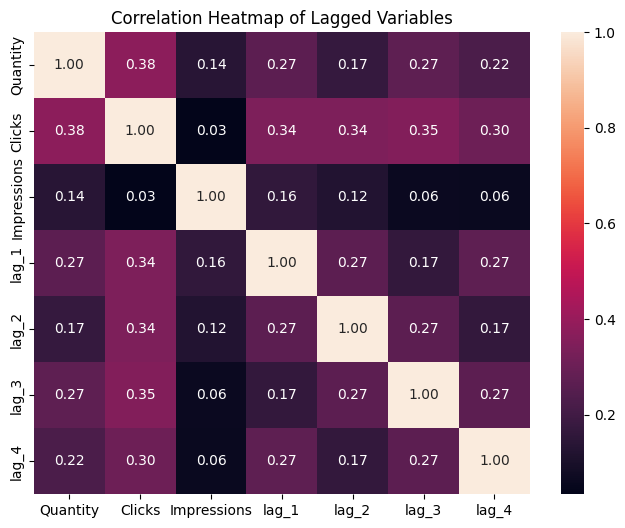

In [62]:
correlation_matrix = data_of_product_lags.corr("pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Lagged Variables')
plt.show()

##### Weekly

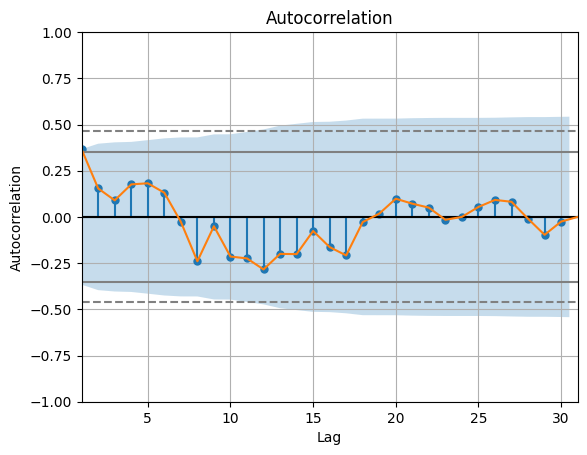

In [63]:
plot_acf(product_A_in_weeks['mean'], lags= 30)
pd.plotting.autocorrelation_plot(product_A_in_weeks['mean'])
plt.show()

In [64]:
# Creating Lags
data_of_product_lags_weeks = pd.DataFrame(index=product_A_in_weeks.index)
data_of_product_lags_weeks['Quantity'] = product_A_in_weeks['mean']
data_of_product_lags_weeks['Clicks'] = google_clicks_in_weeks['mean']
data_of_product_lags_weeks['Impressions'] = facebook_impressions_in_weeks['mean']
data_of_product_lags_weeks['lag_1'] = product_A_in_weeks['mean'].shift(1)
data_of_product_lags_weeks['lag_2'] = product_A_in_weeks['mean'].shift(2)
data_of_product_lags_weeks['lag_3'] = product_A_in_weeks['mean'].shift(3)
data_of_product_lags_weeks['lag_4'] = product_A_in_weeks['mean'].shift(4)


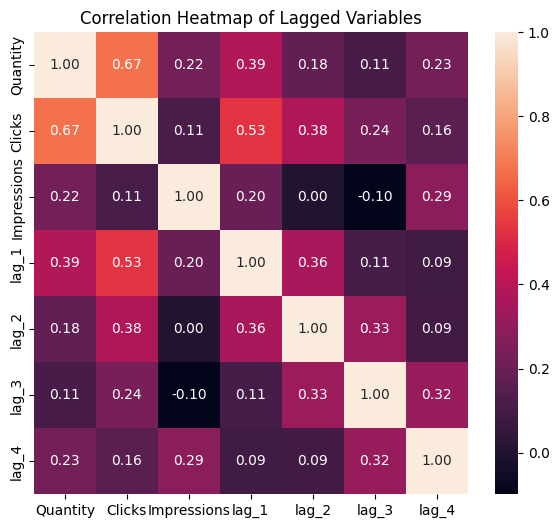

In [65]:
correlation_matrix = data_of_product_lags_weeks.corr("pearson")
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Lagged Variables')
plt.show()

##### 15-days

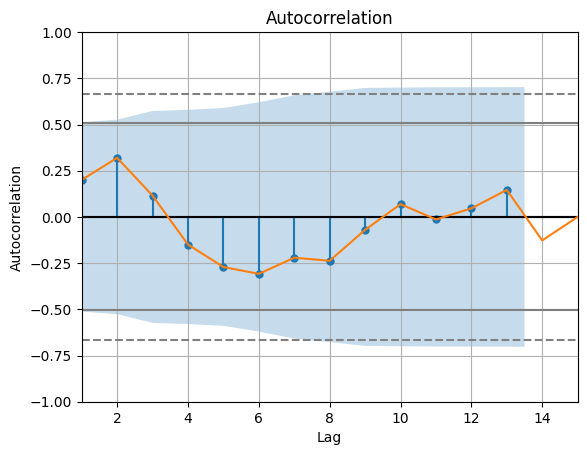

In [66]:
plot_acf(product_A_in_15_days['mean'], lags= 13)
pd.plotting.autocorrelation_plot(product_A_in_15_days['mean'])
plt.show()

In [67]:
# Creating Lags
data_of_product_lags_15_days = pd.DataFrame(index=product_A_in_15_days.index)
data_of_product_lags_15_days['Quantity'] = product_A_in_15_days['mean']
data_of_product_lags_15_days['Clicks'] = google_clicks_in_15_days['mean']
data_of_product_lags_15_days['Impressions'] = facebook_impressions_in_15_days['mean']
data_of_product_lags_15_days['lag_1'] = product_A_in_15_days['mean'].shift(1)
data_of_product_lags_15_days['lag_2'] = product_A_in_15_days['mean'].shift(2)
data_of_product_lags_15_days['lag_3'] = product_A_in_15_days['mean'].shift(3)
data_of_product_lags_15_days['lag_4'] = product_A_in_15_days['mean'].shift(4)


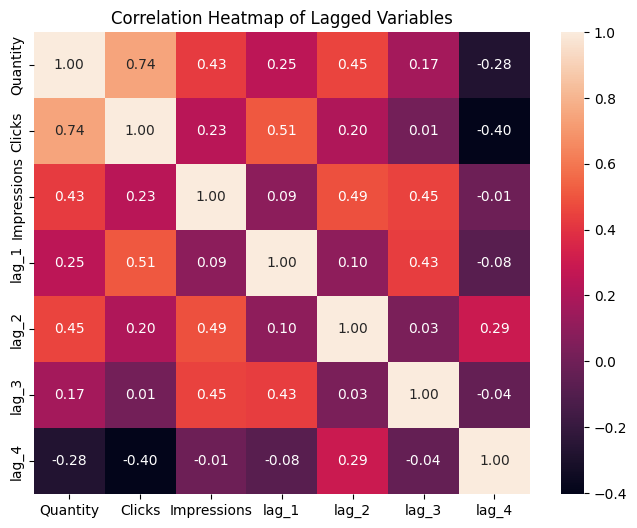

In [68]:
correlation_matrix = data_of_product_lags_15_days.corr("pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Lagged Variables')
plt.show()

##### Month

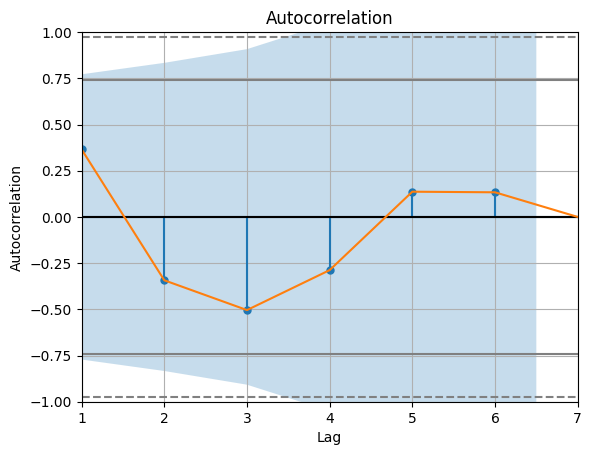

In [69]:
plot_acf(product_A_in_months['mean'], lags= 6)
pd.plotting.autocorrelation_plot(product_A_in_months['mean'])
plt.show()

In [70]:
# Creating Lags
data_of_product_lags_month = pd.DataFrame(index=product_A_in_months.index)
data_of_product_lags_month['Quantity'] = product_A_in_months['mean']
data_of_product_lags_month['Clicks'] = google_clicks_in_months['mean']
data_of_product_lags_month['Impressions'] = facebook_impression_months['mean']
data_of_product_lags_month['lag_1'] = product_A_in_months['mean'].shift(1)
data_of_product_lags_month['lag_2'] = product_A_in_months['mean'].shift(2)
data_of_product_lags_month['lag_3'] = product_A_in_months['mean'].shift(3)
data_of_product_lags_month['lag_4'] = product_A_in_months['mean'].shift(4)


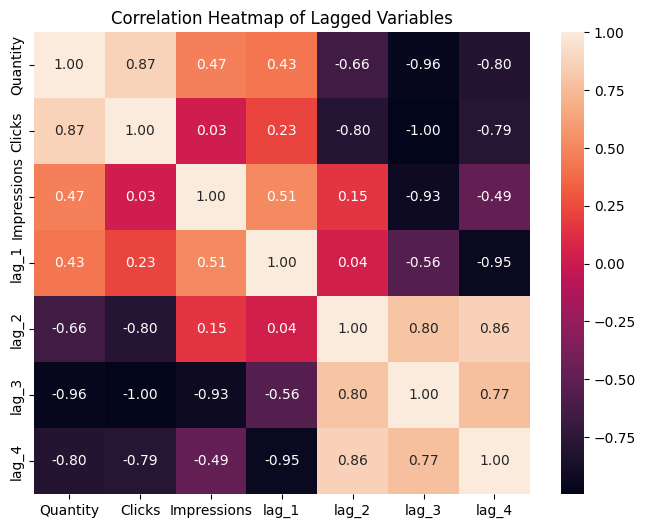

In [71]:
correlation_matrix = data_of_product_lags_month.corr("pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Lagged Variables')
plt.show()

#### Conclusion:
##### 1. ***Daily*** 
- There is a slight correlation between **Clicks** and **lag-1, lag-2 and lag-3**
##### 2. ***Weekly*** 
- Correlation between **Clicks** and **Quantity, lag-1 and lag-2**  
- Correlation between **Quantity** and **lag1**
##### 3. ***15-Days*** 
- Correlation between **Quantity** and **Clicks, Impressions, lag-2**
- Correlation between **Impressions** and **lag-2 and lag-3**
- Correlation between **Clicks** and **lag-1**
##### 4. ***Month***
- Correlation between **Quantity** and **Clicks, Impressions and lag-1**
- Correlation between **Impressions** and **lag-1**
- And also good relation between **lags**

### 6. Google Clicks Effect: An increase in Google clicks is associated with an increase in sales. This tests the effectiveness of online advertising.

### 7. Facebook Impressions Effect: An increase in Facebook impressions is associated with an increase in sales. This tests the impact of social media marketing.

c:\Users\Sunil Magare\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Sunil Magare\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


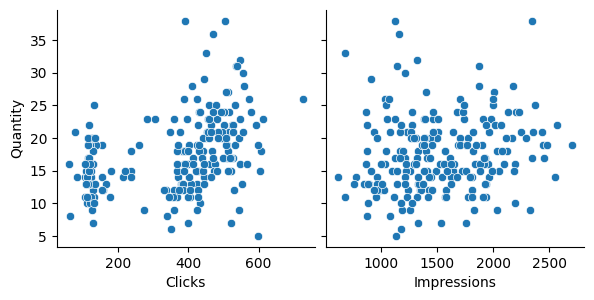

In [74]:
sns.pairplot(product_clicks_impression, x_vars=[ 'Clicks', 'Impressions' ], y_vars = 'Quantity', size = 3, kind = 'scatter' )
plt.show()

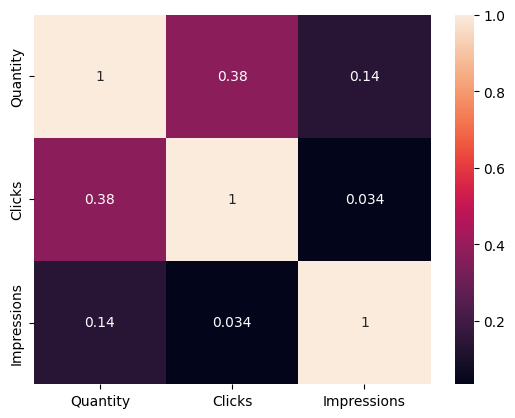

In [83]:
product_clicks_impression_cp = product_clicks_impression
del product_clicks_impression_cp['Day Index']
sns.heatmap(product_clicks_impression_cp.corr(), annot = True )
plt.show()

##### With outliers

In [90]:
X = product_clicks_impression_cp['Clicks']
y = product_clicks_impression_cp['Quantity']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 65 )


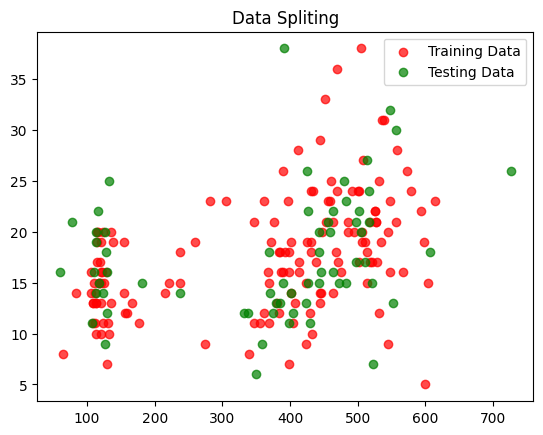

In [92]:
plt.scatter(X_train, y_train, label = "Training Data", color = 'red', alpha=.7)
plt.scatter(X_test, y_test, label= "Testing Data", color='green', alpha=.7)
plt.legend()
plt.title('Data Spliting')
plt.show()

In [93]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

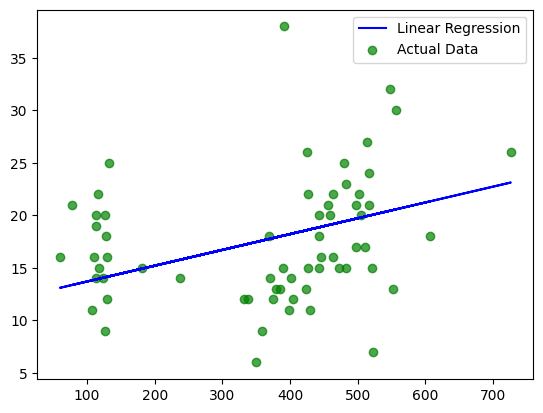

In [94]:
prediction = lr.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label= "Actual Data", color='green', alpha=.7)
plt.legend()
plt.show()

In [95]:
lr.score(X_test.values.reshape(-1,1), y_test.values)

0.03212419187547699

##### Without outliners

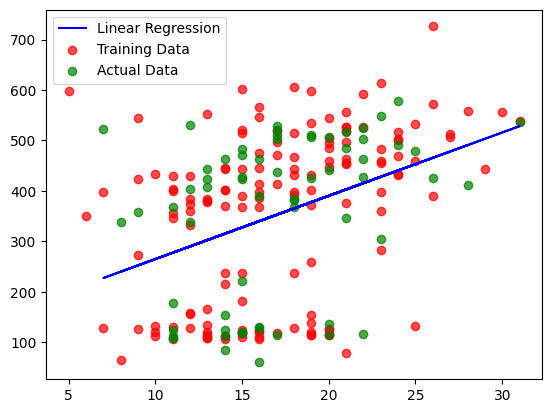

0.1082800606937051 [12.54363697] 139.5557093095387


In [99]:
copy = product_clicks_impression_cp
copy = copy[((copy['Quantity'] > Lower_lim) & (copy['Quantity'] < Upper_lim))]
X1 = copy['Quantity']
y1 = copy['Clicks']
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, train_size = 0.7, test_size = 0.3, random_state = 65 )

lr = LinearRegression()
lr.fit(X_train1.values.reshape(-1,1), y_train1.values)
prediction = lr.predict(X_test1.values.reshape(-1,1))
plt.plot(X_test1, prediction, label='Linear Regression', color='b')
plt.scatter(X_train1, y_train1, label = "Training Data", color = 'red', alpha=.7)
plt.scatter(X_test1, y_test1, label= "Actual Data", color='green', alpha=.7)
plt.legend()
plt.show()
print(lr.score(X_test1.values.reshape(-1,1), y_test1.values),lr.coef_,lr.intercept_)

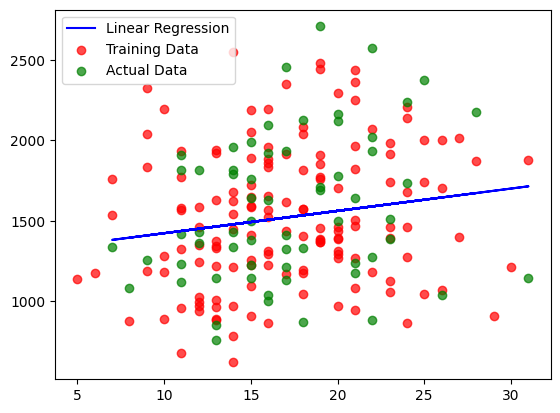

0.0390431011080824 [13.86347176] 1284.300479465007


In [100]:
X1 = copy['Quantity']
y1 = copy['Impressions']
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, train_size = 0.7, test_size = 0.3, random_state = 65 )

lr = LinearRegression()
lr.fit(X_train1.values.reshape(-1,1), y_train1.values)
prediction = lr.predict(X_test1.values.reshape(-1,1))
plt.plot(X_test1, prediction, label='Linear Regression', color='b')
plt.scatter(X_train1, y_train1, label = "Training Data", color = 'red', alpha=.7)
plt.scatter(X_test1, y_test1, label= "Actual Data", color='green', alpha=.7)
plt.legend()
plt.show()
print(lr.score(X_test1.values.reshape(-1,1), y_test1.values),lr.coef_,lr.intercept_)